In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

     --------------------------------------- 10.5/10.5 MB 27.3 MB/s eta 0:00:00
     -------------------------------------- 292.8/292.8 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 23.5 MB/s eta 0:00:00
     ------------------------------------- 307.0/307.0 kB 18.5 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

## notes: https://github.com/susilvaalmeida/machine-learning-andrew-ng

# Linear Regression

## Prediction model: Linear Regression
$\hat{y} = ax + b$

## Cost function: Mean Squared Error(MSE)
###### MSE is a way to measure fitness of the linear model, but not the way to optimize the linear model
$MSE = \frac{1}{N}\sum\limits_{i=1}^{n}(y - \hat{y})^2 = 
\frac{1}{N}\sum\limits_{i=1}^{n}(y - (ax + b))^2$ <br>

## Optimization function: Gradient Descent Algorithm in MSE
###### Gradient Descent is used to calculate the gradient of the cost function, minimize the cost (value of cost function)
* if we visualise the cost function, it is a "U" curve for the MSE, because the MSE is very high if we initialise the equation is $\hat{y} = 0 + 3x$ or increase the value of intercept $\hat{y} = 999 + 3x$ <br>
* Therefore, we need to use derivative to find the minimum point point in cost function of intercept(b) and coef(a)
###### Derivative of intercept: $ \frac{d}{d b} = \frac{2}{n}\sum\limits_{i=1}^{n}[y - (b + ax)]*-1$
 * the result is the slope of intercept 
###### Derivative of coef: $ \frac{d}{d a} = \frac{2}{n}\sum\limits_{i=1}^{n}[y - (b + ax)]*-x$
 * the result is the slope of coef

###### Steps for intercept
1. Take the derivative of the cost function for intercept in it.
2. Pick a random values of intercept for the derivative, eg; 0
3. Calculate the derivative of intercept (slope of intercept)
4. Step size = slope * 0.1(learning rate)
5. New intercept = old intercept - step size
6. Repeat 2-4 until the slope = 0.009 / step size = 0.0009

###### Steps for coef
1. Take the derivative of the cost function for coef in it.
2. Pick a random values of coef for the derivative, eg; 1
3. calculate the derivative of coef (slope of coef)
4. Step size = slope * 0.1(learning rate)
5. New coef = old coef - step size
6. repeat 2-4 until the slope = 0.009 / step size = 0.0009

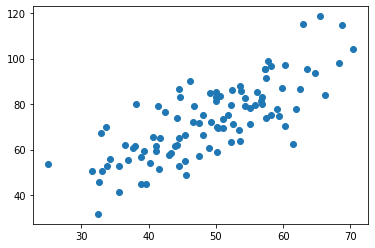

In [44]:
df = pd.read_csv('data_file/linear_regression.csv')
X = df['x']
Y = df['y']
plt.scatter(X, Y)

In [ ]:
# prediction model
def linear_regression(m, x, c):
    y_pred = m*x + c
    return y_pred

In [ ]:
# Derivative of cost function(MSE)
def Derivative(X, Y, Y_pred, n):
    Deriv_m = -2/n * sum(X * (Y - Y_pred))
    Deriv_c = -2/n * sum(Y - Y_pred)
    return Deriv_m, Deriv_c

Equation: 0.737x + 0.015
Deriv_m: -7370.702973591054, step_size_m: -0.7370702973591055
Deriv_c: -145.47010110737295, step_size_c: -0.014547010110737297

Equation: 1.107x + 0.022
Deriv_m: -3697.251569924105, step_size_m: -0.3697251569924105
Deriv_c: -73.26952848859109, step_size_c: -0.007326952848859109

Equation: 1.292x + 0.026
Deriv_m: -1854.592105615957, step_size_m: -0.18545921056159573
Deriv_c: -37.052613616967236, step_size_c: -0.003705261361696724

Equation: 1.385x + 0.027
Deriv_m: -930.2859073813341, step_size_m: -0.09302859073813342
Deriv_c: -18.885652378512162, step_size_c: -0.0018885652378512164

Equation: 1.432x + 0.028
Deriv_m: -466.63976733075407, step_size_m: -0.04666397673307541
Deriv_c: -9.772824225946072, step_size_c: -0.0009772824225946072

Equation: 1.455x + 0.029
Deriv_m: -234.0677651372031, step_size_m: -0.023406776513720313
Deriv_c: -5.201687847396551, step_size_c: -0.0005201687847396551

Equation: 1.467x + 0.029
Deriv_m: -117.40608822094515, step_size_m: -0.01174

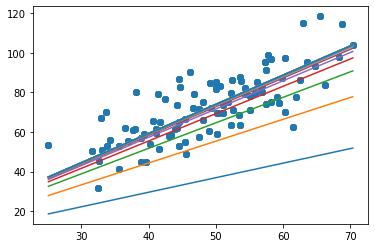

In [ ]:
# Gradient Descent Algorithm
# default setting for parameters
m = 0
c = 0
X = df['x']
Y = df['y']

learning_rate = 0.0001
n = len(X)

# record only
Deriv_m = 0
Deriv_c = 0
step_size_m = 0
step_size_c = 0

run_count = 0

while True:
    Y_pred = linear_regression(m, X, c)
    
    # derivate the coef(m) and intercept(c)
    Deriv_m, Deriv_c = Derivative(X, Y, Y_pred, n)
    
    # calculate the step size by Derive and inearning rate
    step_size_m = Deriv_m * learning_rate
    step_size_c = Deriv_c * learning_rate
    
    # plug the step back to coef(m) and intercept(c)
    m = m - step_size_m
    c = c - step_size_c
    
    # record only-------------------------------------------
    run_count += 1
    print(f'Equation: {round(m, 3)}x + {round(c, 3)}')
    print(f'Deriv_m: {Deriv_m}, step_size_m: {step_size_m}')
    print(f'Deriv_c: {Deriv_c}, step_size_c: {step_size_c}')
    print()
    
    Y_pred = m*X + c

    plt.scatter(X, Y)
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)] )
    #-------------------------------------------------------
    
    # gradient descent stop until the Derivative of coef and intercept small enough
    if Deriv_m > 0.00001 or Deriv_c > 0.00001:
        break

print(f'Iteration count: {run_count}')

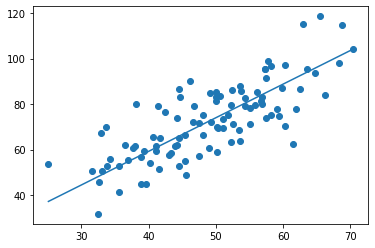

In [ ]:
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)] )

In [ ]:
# further analysis
# R square
# confident interval


# Logistic Regression

## Prediction Model: Sigmoid
#### $S(z) = \frac{1}{1+e^{-z}}, z = mx + c$
#### z is function input, $z=mx + c$
Return: probability
Decision Boundary: <br>
$p \ge 0.5, class = 1$ <br>
$p \lt 0.5, class = 0$

## Cost Function: Cross Entropy (Log Loss)
### $J = \frac{1}{n}\sum\limits_{i=1}^{n} [y * \log(\hat{y}) + (1-y) * \log(1-\hat{y})]$

## Optimization function: Gradient Descent in Cross Entropy
### Derivative of cross entropy for m
Cost function (cross entropy): $J = \sum\limits_{i=1}^{n} [y * \log(a) + (1-y) * \log(1-a)]$ <br>
Sigmoid: $\hat{y} = \frac{1}{1+e^{-z}}$ <br>
parameter: $z = mx + c$ <br>
$\frac{dJ}{dm} = \frac{dJ}{d\hat{y}} * \frac{d\hat{y}}{dz} * \frac{dz}{dm}$ <br>
$\frac{dJ}{d\hat{y}} = \frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}}$ ------
$\frac{da}{dz} = \hat{y}*(1-\hat{y})$ ------
$\frac{dz}{dm} = x$ <br>
$\frac{dJ}{dm} = \frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}} * \hat{y}*(1-\hat{y}) * x = (\hat{y}-y)*x$
##### Derivative of m = $\frac{1}{n}\sum\limits_{i=1}^{n}(\hat{y}-y)*x$

### Derivative of cross entropy for c
Cost function (cross entropy): $J = \sum\limits_{i=1}^{n} [y * \log(a) + (1-y) * \log(1-a)]$ <br>
Sigmoid: $\hat{y} = \frac{1}{1+e^{-z}}$ <br>
parameter: $z = mx + c$ <br>
$\frac{dJ}{dc} = \frac{dJ}{d\hat{y}} * \frac{d\hat{y}}{dz} * \frac{dz}{dc}$ <br>
$\frac{dJ}{d\hat{y}} = \frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}}$ ------
$\frac{da}{dz} = \hat{y}*(1-\hat{y})$ ------
$\frac{dz}{dc} = 1$ <br>
$\frac{dJ}{dc} = \frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}} * \hat{y}*(1-\hat{y}) * 1 = (\hat{y}-y)$
##### Derivative of c = $\frac{1}{n}\sum\limits_{i=1}^{n}(\hat{y}-y)$

###### Steps for intercept
1. Take the derivative of the cost function for intercept in it.
2. Pick a random values of intercept for the derivative, eg; 0
3. Calculate the derivative of intercept (slope of intercept)
4. Step size = slope * 0.1(learning rate)
5. New intercept = old intercept - step size
6. Repeat 2-4 until the slope = 0.009 / step size = 0.0009

###### Steps for coef
1. Take the derivative of the cost function for coef in it.
2. Pick a random values of coef for the derivative, eg; 1
3. calculate the derivative of coef (slope of coef)
4. Step size = slope * 0.1(learning rate)
5. New coef = old coef - step size
6. repeat 2-4 until the slope = 0.009 / step size = 0.0009

In [46]:
df = pd.read_csv('https://drive.google.com/uc?id=15WAD9_4CpUK6EWmgWVXU8YMnyYLKQvW8&export=download')

In [47]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
219,15732987,Male,59,143000,1
62,15595135,Female,23,66000,0
152,15699247,Male,31,76000,0
90,15684801,Male,22,81000,0
124,15678168,Female,41,51000,0


<AxesSubplot:xlabel='Age', ylabel='Purchased'>

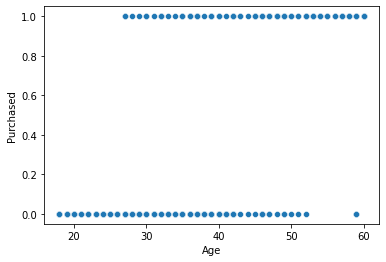

In [68]:
sns.scatterplot(x='Age', y='Purchased', data=df)

### Decision boundary

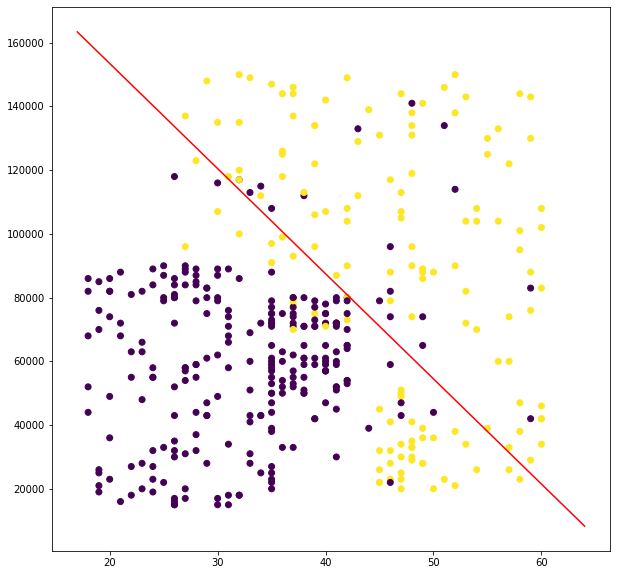

In [49]:
X = np.array(df[['Age', 'EstimatedSalary']])
y = np.array(df['Purchased'])

# Manually plot a decision boundary
x0 = np.arange(17, 65)
x1 = 219500 - 3300*x0

fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y)

plt.plot(x0, x1, c='red')

### Prediction Function: Sigmoid

In [50]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

#### Visualize the sigmoid function for input -10 to 10

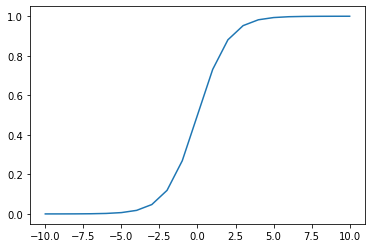

In [51]:
z_tmp = np.arange(-10, 11)
h = sigmoid(z_tmp)
plt.plot(z_tmp, h)

### Normalization

In [52]:
def Normalization(series):
    return (series - min(series)) / (max(series) - min(series))

### Cost function: Cross Entropy

In [53]:
def Cross_Entropy(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    grad = (1/m) * (h - y).T.dot(X)

    return J, grad

In [54]:
df['Age_norm'] = Normalization(df['Age'])
df['Salary_norm'] = Normalization(df['EstimatedSalary'])
X = np.hstack((np.ones((y.shape[0],1)),df[['Age_norm', 'Salary_norm']].values))
y = np.array(df['Purchased']).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1]))

iteration = 0
while True:
    cost, derivative = Cross_Entropy(theta, X, y)
    step_size = derivative * 0.1
    theta = theta - np.squeeze(np.asarray(step_size))

    if iteration%5000 == 0:
        print(f'cost: {cost}')
        print(f'theta: {theta}')
        print(f'derivative: {derivative}')
        print()
        
    if cost < 0.3464:
        print(f'cost: {cost}')
        print(f'theta: {theta}')
        print(f'derivative: {derivative}')
        break
    iteration += 1
print(iteration)

cost: [[0.69314718]]
theta: [-0.01425     0.00076786 -0.00140093]
derivative: [[ 0.1425     -0.00767857  0.01400926]]

cost: [[0.35614232]]
theta: [-5.71219321  7.1960365   3.50604717]
derivative: [[ 0.00349322 -0.00460236 -0.00236342]]

cost: [[0.34810704]]
theta: [-6.79086866  8.61642806  4.23732647]
derivative: [[ 0.00130718 -0.00172239 -0.00088569]]

cost: [[0.34673976]]
theta: [-7.24228226  9.21167591  4.54278541]
derivative: [[ 0.00060508 -0.00079852 -0.00040884]]

cost: [[0.34642562]]
theta: [-7.45955479  9.4985302   4.68948269]
derivative: [[ 0.00030231 -0.00039929 -0.00020396]]

cost: [[0.34639999]]
theta: [-7.48781772  9.53586188  4.70854881]
derivative: [[ 0.00026445 -0.00034933 -0.00017838]]
20999


### Trained Decision boundary

(-0.02, 1.02)

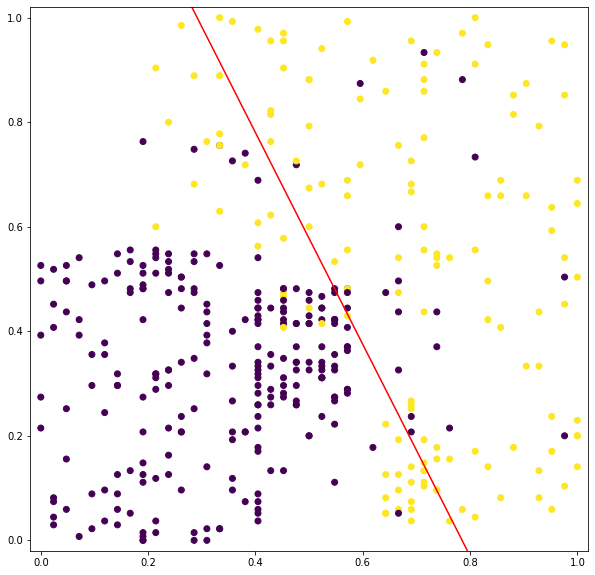

In [66]:
X_plot = np.array(df[['Age_norm', 'Salary_norm']])
y_plot = np.array(df['Purchased'])

# use the last trained theta: [-7.48781772  9.53586188  4.70854881]
# -7.48781772 + 9.53586188 * x0  +  4.70854881 * x1 = 0
# --> x1 = (-7.48781772 + 9.53586188 * x0) / -4.70854881
x0 = np.arange(0, 1, 0.1)
x1 = (-7.48781772 + 9.53586188*x0)/-4.70854881 

fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.scatter(X_plot[:,0], X_plot[:,1], c=y_plot)

plt.plot(x0, x1, c='red')
plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)

# K-Nearest  Neighbor (KNN)

In [206]:
df = pd.read_csv('https://drive.google.com/uc?id=15WAD9_4CpUK6EWmgWVXU8YMnyYLKQvW8&export=download')

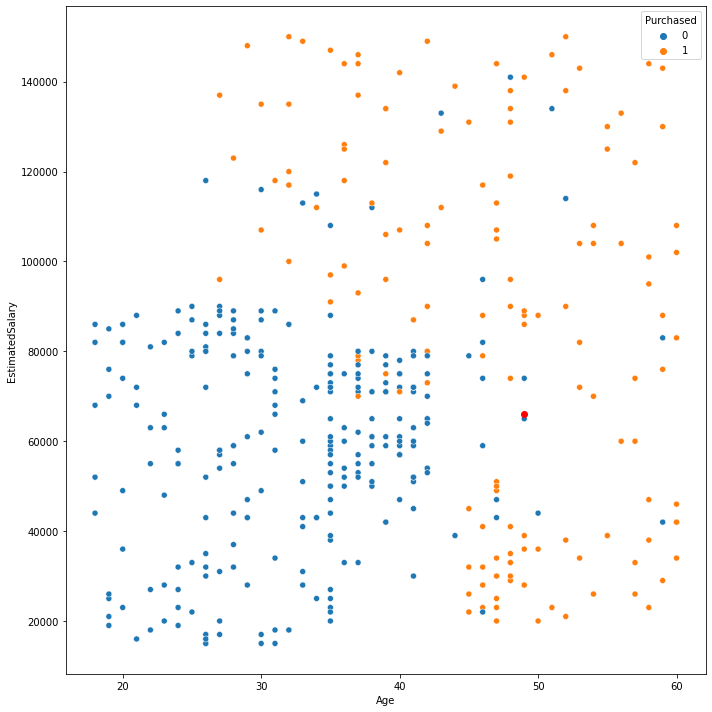

In [207]:
knn = df.copy()
plt.figure(figsize=(10, 10))
_ = sns.scatterplot(x='Age', y='EstimatedSalary',data=knn, hue=df['Purchased'])
plt.scatter(x=49, y=66000, c='red')

In [208]:
knn

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [209]:
# new data input
def New_data(ids, gender, age, salary):
    return pd.Series({'User ID': ids, 
                      'Gender': gender, 
                      'Age': age,
                      'EstimatedSalary': salary, 
                      'Purchased': None})

### Normalization
Normalization: make every features have the same weight. <br>
Age range: 18 - 60 <br>
Salary range: 15000 - 150000 <br>
Large distance in Age have small impact to a small distance in Salary. <br>
For example, large distance in age: 40, small distance in salary: 2000. Salary dominate the total distance.

In [210]:
def Normalization(series):
    return (series - min(series)) / (max(series) - min(series))

In [211]:
new_input = New_data(12312312, 'Male', 25, 33000)

knn['Age_n'] = Normalization(knn['Age'])
knn['EstimatedSalary_n'] = Normalization(knn['EstimatedSalary'])
x1 = (new_input['Age'] - min(knn['Age'])) / (max(knn['Age']) - min(knn['Age']))
x2 = (new_input['EstimatedSalary'] - min(knn['EstimatedSalary'])) / (max(knn['EstimatedSalary']) - min(knn['EstimatedSalary']))

# Euclidean distance
knn['distance'] = np.sqrt((x1 - knn['Age_n'])**2 + (x2 - knn['EstimatedSalary_n'])**2)

# Value assignment
new_input['Purchased'] = knn.sort_values('distance')[:9]['Purchased'].value_counts().idxmax()

new_input

User ID            12312312
Gender                 Male
Age                      25
EstimatedSalary       33000
Purchased                 0
dtype: object

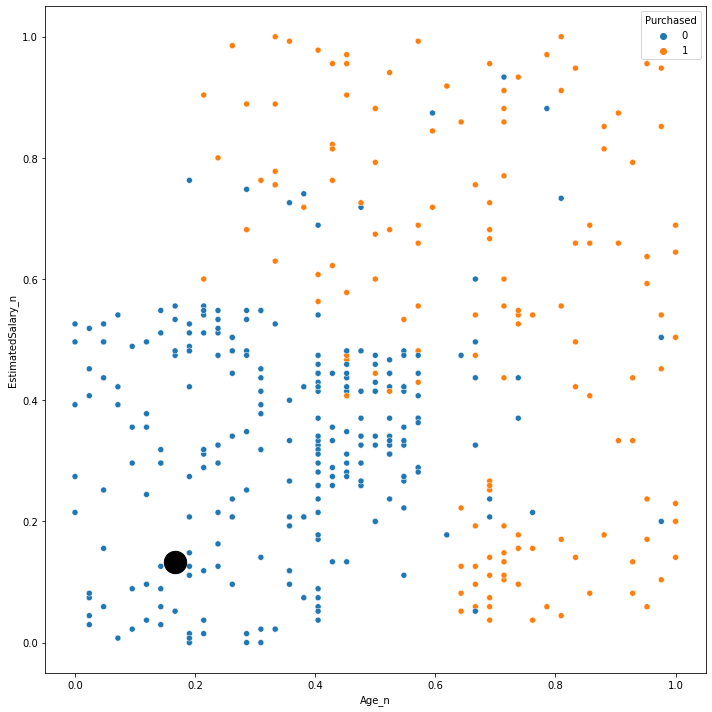

In [166]:
color_map = {0: 'blue', 1: 'orange'}
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Age_n', y='EstimatedSalary_n', data=knn, hue='Purchased')
plt.scatter(x1, x2, c='black', s=500)

### KNN with sklearn

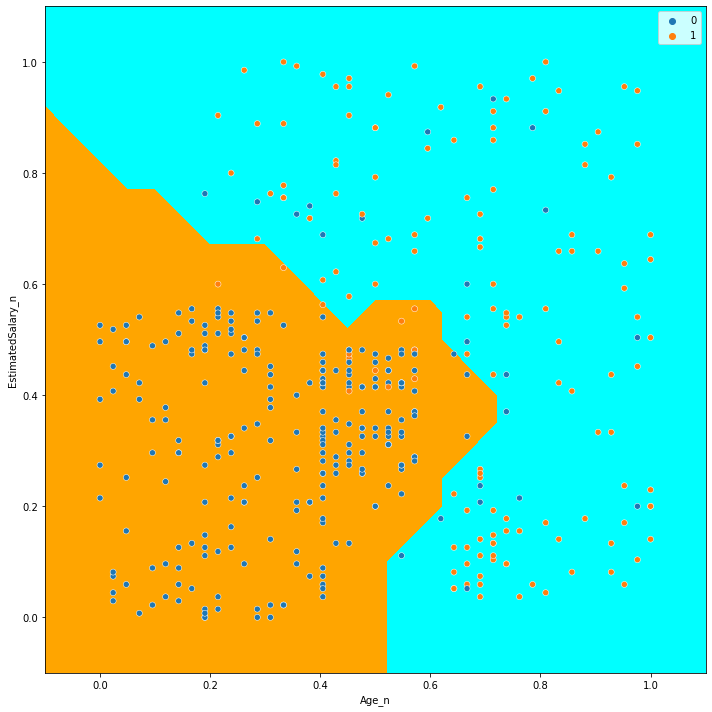

In [302]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

from matplotlib.colors import ListedColormap
from sklearn import neighbors

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

n_neighbors = 11
X = np.array(knn[['Age_n', 'EstimatedSalary_n']])
y = np.array(knn['Purchased'])
h = 0.05

cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'c']


clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 10))

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.xlabel('Age_n')
plt.ylabel('EstimatedSalary_n')


plt.show()

# Unsupervised Learning

# K Mean
- Means Clustering is an **Unsupervised learning algorithm**, which groups the unlabeled dataset into different clusters

## Prediction Model: Euclidean distance
$d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

## Optimization Function (find the best number of K): Elbow Method
## Cost function: $\frac{1}{m}\sum\limits_{i=1}^{m}\lvert x^{i} - \mu_{c^{i}}\lvert ^2$ 
$c^{i}$: index of cluster {1, 2, 3, ..., K} assigning to each data, such as $c^{45} = 2$ <br>
$\mu_{c^{i}}$: the position / value of corresponding cluster centroid, such as (x, y) <br> 
Calculate the **average sum of square** distance between data and corresponding centroid 
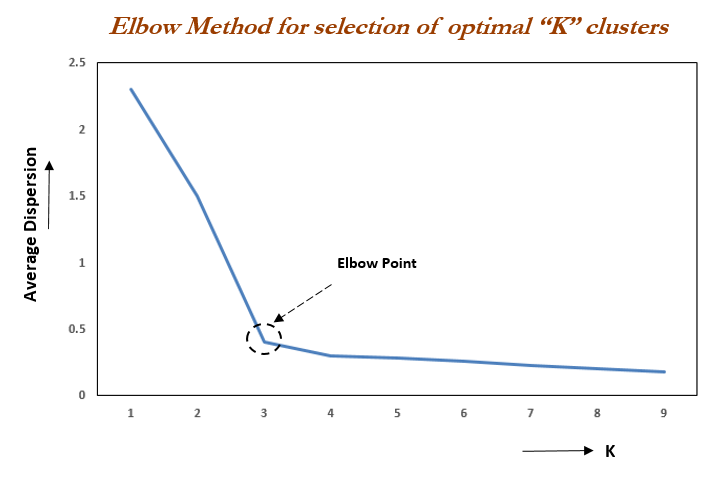!

## Random initialization
**Aim**: Avoid the K-mean drop into bad local minimum <br>
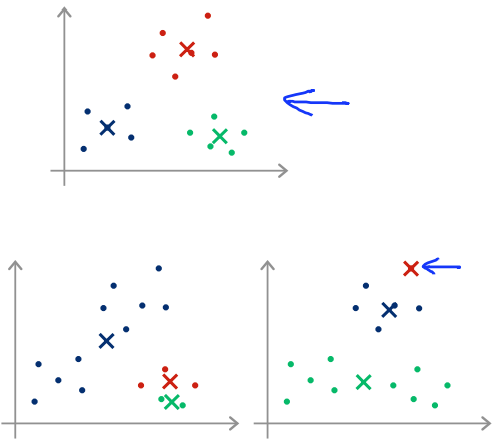 <br>
**Method**
- for loop 100 times
    1. Random initializa K-means from existing data
    2. Run K-means
    3. Compute cost function J (distortion)
4. Choose the clustering that gave lowest cost J

### How does the K-Means Algorithm work?
**Step 1**: Observe the datas and decide how many clusters(K / centroids) are needed <br>
**Step 2**: Randomly assign the centroids to the anywhere <br>
**Step 3**: Calculate the distant between the data point and each centroids --> $d = \sqrt{(x_1 - x_c)^2 + (y_1 - y_c)^2}$, c = centroid<br> 
**Step 4**: Assign each data points to their closest centroid <br>
**Step 5**: Calculate x,y of the centroid by their owned clustered data ($x_c=\frac{1}{m}\sum\limits_{i=1}^{m}x$, $y_c=\frac{1}{m}\sum\limits_{i=1}^my$) <br>
**Step 6**: Repeat **Step 3 - 5** until the datas do not change their owned cluster

In [161]:
from sklearn.datasets import make_blobs
import statistics

In [162]:
k_mean = make_blobs()
X = k_mean[0]
y = k_mean[1]

<AxesSubplot:>

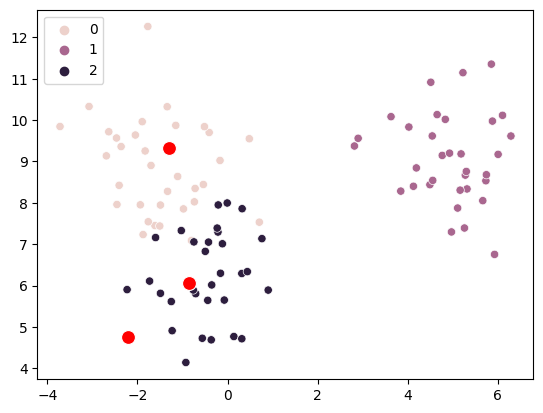

In [163]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
centroid_i = X[np.random.randint(X.shape[0], size=3), :]
sns.scatterplot(centroid_i[:,0], centroid_i[:,1], color='red', s=100)

### Prediction Function: Euclidean distance & find the closest centroid

In [164]:
def Find_Closest_Centroid(X, centroids):
    idx = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        idx[i] = np.argmin(np.sqrt(np.sum((X[i, :] - centroids)**2, axis=1)))
    return idx

In [165]:
idx = Find_Closest_Centroid(X, centroid_i)
idx[:5]

array([[0.],
       [0.],
       [0.],
       [2.],
       [2.]])

### Compute / Update the new centroid

In [166]:
def Compute_Centroid(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i, :] = np.mean(X[(idx==i).T[0], :], axis=0)
    centroids[np.isnan(centroids)] = 0
    return centroids

In [167]:
centroid = Compute_Centroid(X, idx, 3)
centroid

array([[ 1.26119759,  9.31636921],
       [-1.65025181,  4.92898222],
       [ 0.79618002,  6.79193273]])

### Cost Function (Average Square Distance)

In [168]:
def Cost_Function(X, idx, centroids):
    total_distance = np.zeros(1)
    for i in range(X.shape[0]):
        distance = np.sqrt(np.sum((X[i, :] - centroids[int(idx[i]), :])**2, axis=0))
        total_distance += distance
    return total_distance/X.shape[0]

### Iterate the K-Mean (find the best number of K with Elbow method)

In [169]:
elbow_cost = {}
for num_k in range(1, 10):
    # iterate 100 to reduce the initialize centroid drop into bad local minimum
    costs = []
    for num_initialize in range(100):
        k_init = X[np.random.randint(X.shape[0], size=num_k), :]

        while True:
            idx = Find_Closest_Centroid(X, k_init)
            k_new = Compute_Centroid(X, idx, num_k)
            
            
            if (k_new == k_init).all() == True:
                costs.append(Cost_Function(X, idx, k_new))
                break
            else:
                k_init = k_new

        elbow_cost[num_k] = min(costs)

Based on the elbow method, 3-centroids is the best number to classify the data


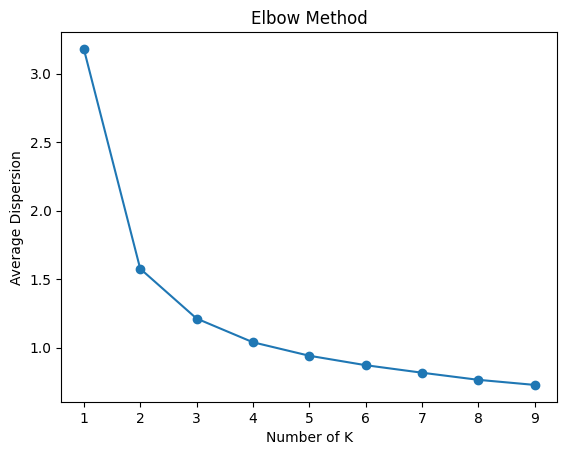

In [170]:
_ = plt.plot(list(elbow_cost.keys()), list(elbow_cost.values()), marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of K')
plt.ylabel('Average Dispersion')
print('Based on the elbow method, 3-centroids is the best number to classify the data')

### Given 3 centroids are the best number, we iterate it for 100 time to avoid bad local minimium and show the best classification

In [171]:
num_k = 3
best_cost = 999
best_centroid = np.zeros((number_k, X.shape[1]))

# iterate 100 to reduce the initialize centroid drop into bad local minimum
for num_initialize in range(100):
    k_init = X[np.random.randint(X.shape[0], size=num_k), :]

    while True:
        idx = Find_Closest_Centroid(X, k_init)
        k_new = Compute_Centroid(X, idx, num_k)

        if (k_new == k_init).all() == True:
            mean_cost = Cost_Function(X, idx, k_new)
            if mean_cost < best_cost:
                best_cost = mean_cost
                best_centroid = k_new
            break
        else:
            k_init = k_new

<AxesSubplot:>

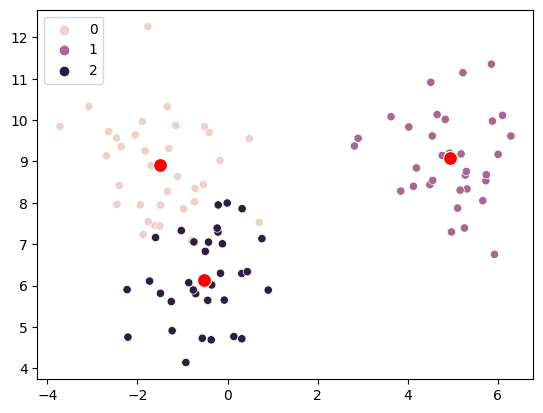

In [172]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
centroid_i = X[np.random.randint(X.shape[0], size=3), :]
sns.scatterplot(k_new[:,0], k_new[:,1], color='red', s=100)

In [160]:
print('the best 3 centroid:')
print(f'{best_centroid}')

the best 3 centroid:
[[-8.51594103 -0.83455853]
 [-5.66478711 -2.6637637 ]
 [-2.50909421 -6.51079898]]


# Decision Tree
Link: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/

## How to choose the root node
For each categorical features, we identify the feature values (Y & N) into two leaves. For each leaves, we identify the target distribution
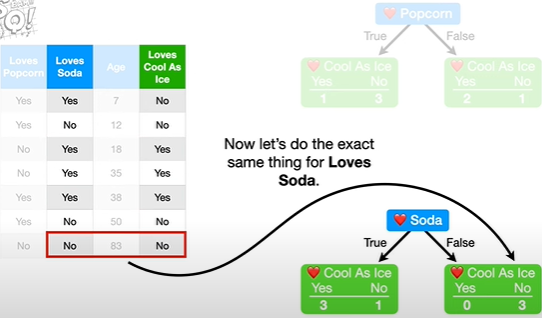 <br>

## Prediction Model 1: Entropy
Def: Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations. 
- Bigger = impure
- Smaller = pure
- Range: 0-1

Equation: $E= \sum p(x)log(\frac{1}{p(x)}) = -\sum p(x)\log_2(p(x))$

## Prediction Model 2: Gini Impurity
Def: tells us what is the probability of misclassifying an observation. Note that the lower the Gini the better the split and the lower the likelihood of misclassification. <br>
Gini Impurity for a Leaf = 1 - [\(probability of 'Yes'\)$^2$ + \(probability of 'No'\)$^2$]<br>
$Gini=1 - \sum\limits_{i-1}^{n}(p_i)^2$, for each leaves <br>
Then, sum each Gini with its owned weight(number on its leaves / total number) $\sum\limits_{i=1}^{n}n_i/N*Gini_i$

## Prediction Model: Information Gain
Information gain as a measure of how much information a feature provides about a class. Information gain helps to determine the **order of attributes (the higher the first to be the node)** in the nodes of a decision tree. <br>
E(Parent): the impurity of the y without split by features <br>
E(Parent|Feature X1): the impurity of the y after split by features X1 <br>
**Information Gain = E(Parent) - E(Parent|Feature X1)** <br>

### Gini Impurity (Numeric Data)
**Steps**
1. Sort the feature values
2. Calculate all the average value for all adjacent values. For example, [1, 3, 4, 6, 9, 13], average value: [2, 3.5, 5, 7.5, 11]
3. For each average value, we use it for the classifier threshold.
4. Calculate the Gini impurity(Categorical Data)
5. Choose the threshold with the lowest Gini Impurity <br>

After choosing the root node, each for internal nodes (branches), we can choose the next node based on the same Gini impurity method aboved until Gini impurity 0. But there may be **overfit**, so we can 
1. Pruning method
2. the distribution of extreme enough, eg: 3:7 or 2:8 to stop the tree.
3. stop the tree if people in the leave is small enough in a certain level 

In [2]:
from sklearn.datasets import load_iris

In [236]:
X, y = load_iris(return_X_y=True)

In [169]:
def Convert_num_cat(X, y):
    pass

In [237]:
def split(X, y, threshold):
    class1 = y[np.where(X[:, 0][X[:, 0]>6])]
    class2 = y[np.where(X[:, 0][X[:, 0]<=6])]
    return class1, class2

In [252]:
groups = split(X, y, 2)
entropy = 0
total_num = np.sum([group.shape[0] for group in groups])
for group in groups:
    y = group
    group_size = y.shape[0]
    _, count = np.unique(y, return_counts=True)
    p = count / group_size
    weight = group_size / total_num
    entropy += (p @ np.log(1/p)) * weight
entropy

0.5986259325205303

In [212]:
def Entropy(*groups):
    entropy = 0
    total_num = np.sum([group.shape[0] for group in groups])
    
    for group in groups:
        y = group[1]
        group_size = y.shape[0]
        _, count = np.unique(y, return_counts=True)
        p = count / group_size
        weight = group_size / total_num
        
        entropy += (p @ np.log(1/p)) * weight
    return entropy

In [166]:
def Gini(*gorups):
    gini = 0
    total_num = np.sum([group.shape[0] for group in groups])
    
    for group in groups:
        y = group[1]
        group_size = y.shape[0]
        _, count = np.unique(y, return_counts=True)
        p = count / group_size
        weight = group_size / total_num
        
        gini += (1 - np.sum(p**2)) * weight
    return entropy

In [167]:
def Information_Gain(X, y, feature_entropy):
    target, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    parent_entropy = p @ np.log(1/p)
    return parent_entropy - feature_entropy